|    |   Processors |   Time Used |         Sum |   Sum of Square |   Speedup |   Efficiency |
|---:|-------------:|------------:|------------:|----------------:|----------:|-------------:|
|  0 |            1 |    5.29918  | 3.01222e+07 |     6.85949e+09 |  1        |     1        |
|  1 |            1 |    6.33586  | 3.01222e+07 |     6.85949e+09 |  0.836379 |     0.836379 |
|  2 |            4 |    1.572    | 3.01222e+07 |     6.85949e+09 |  3.37098  |     0.842745 |
|  3 |            9 |    0.706621 | 3.01222e+07 |     6.85949e+09 |  7.49932  |     0.833258 |
|  4 |           16 |    1.36059  | 3.01222e+07 |     6.85949e+09 |  3.89477  |     0.243423 |
|  5 |           25 |    1.15315  | 3.01222e+07 |     6.85949e+09 |  4.5954   |     0.183816 |
|  6 |           36 |    0.181723 | 3.01221e+07 |     6.85949e+09 | 29.1608   |     0.810021 |


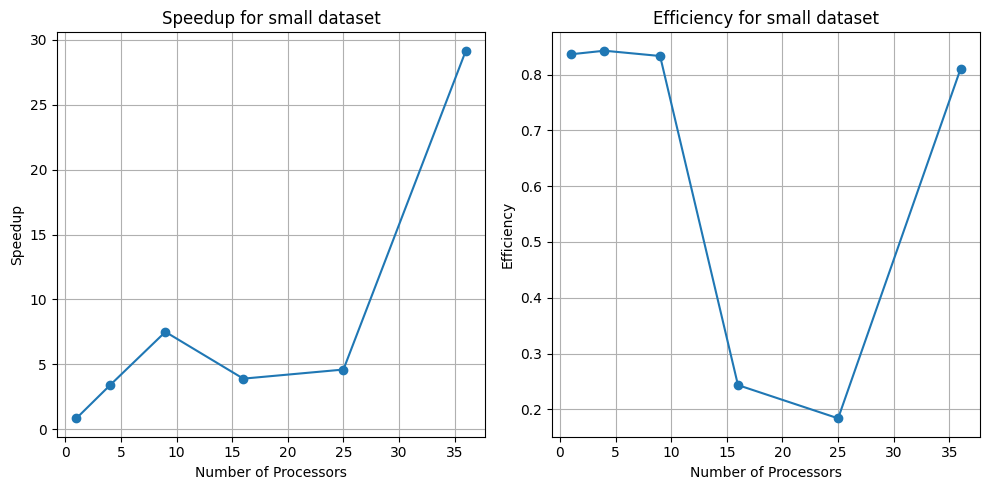

|    |   Processors |   Time Used |         Sum |   Sum of Square |   Speedup |   Efficiency |
|---:|-------------:|------------:|------------:|----------------:|----------:|-------------:|
|  0 |            1 |   21.0927   | 1.19289e+08 |     1.41824e+10 |  1        |     1        |
|  1 |            1 |   24.9095   | 1.19289e+08 |     1.41824e+10 |  0.846773 |     0.846773 |
|  2 |            4 |    6.18114  | 1.19289e+08 |     1.41824e+10 |  3.41243  |     0.853107 |
|  3 |            9 |    2.79223  | 1.19288e+08 |     1.41824e+10 |  7.55407  |     0.839341 |
|  4 |           16 |    4.78574  | 1.19289e+08 |     1.41824e+10 |  4.40741  |     0.275463 |
|  5 |           25 |    3.43128  | 1.19288e+08 |     1.41824e+10 |  6.14718  |     0.245887 |
|  6 |           36 |    0.737762 | 1.19288e+08 |     1.41824e+10 | 28.5901   |     0.79417  |


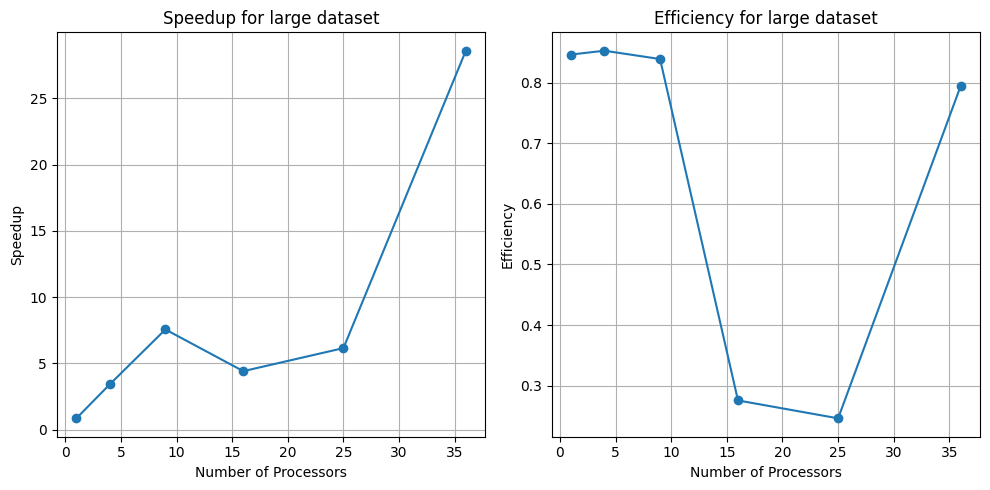

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
def read_everything_from_file(filename):
    latency = 0
    sum_value = 0  # Renamed to avoid conflict with built-in 'sum'
    sum_of_square = 0
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("Time:"):
                latency = float(line.split()[1])
            elif line.startswith("Sum is:"):
                sum_value = float(line.split()[2])
            elif line.startswith("Sum of square is:"):
                sum_of_square = float(line.split()[4])
    return latency, sum_value, sum_of_square

def plot_speedup_efficiency(df, dataset_name):
    plt.figure(figsize=(10, 5))

    # Plot speedup
    plt.subplot(1, 2, 1)
    plt.plot(df['Processors'], df['Speedup'], marker='o', label='Speedup')
    plt.xlabel('Number of Processors')
    plt.ylabel('Speedup')
    plt.title(f'Speedup for {dataset_name} dataset')
    plt.grid(True)

    # Plot efficiency
    plt.subplot(1, 2, 2)
    plt.plot(df['Processors'], df['Efficiency'], marker='o', label='Efficiency')
    plt.xlabel('Number of Processors')
    plt.ylabel('Efficiency')
    plt.title(f'Efficiency for {dataset_name} dataset')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

files = {
    'small': {
        1: 'parallel-small-1.txt',
        4: 'parallel-small-4.txt',
        9 : 'parallel-small-9.txt',
        16: 'parallel-small-16.txt',
        25: 'parallel-small-25.txt',
        36: 'parallel-small-36.txt',
        'serial': 'serial-small.txt'
    },
    'large': {
        1: 'parallel-large-1.txt',
        4: 'parallel-large-4.txt',
        9 : 'parallel-large-9.txt',
        16: 'parallel-large-16.txt',
        25: 'parallel-large-25.txt',
        36: 'parallel-large-36.txt',
        'serial': 'serial-large.txt'
    }
}

for dataset_size in ['small', 'large']:

    serial_latency, serial_sum, serial_sum_of_square = read_everything_from_file(files[dataset_size]['serial'])

    parallel_times = {p: read_everything_from_file(files[dataset_size][p]) for p in [1, 4, 9, 16, 25, 36]}

    data = {
        'Processors': [1, 1, 4, 9, 16, 25, 36],
        'Time Used': [serial_latency] + [parallel_times[p][0] for p in [1, 4, 9, 16, 25, 36]],
        'Sum': [serial_sum] + [parallel_times[p][1] for p in [1, 4, 9, 16, 25, 36]],
        'Sum of Square': [serial_sum_of_square] + [parallel_times[p][2] for p in [1, 4, 9, 16, 25, 36]]
    }

    df = pd.DataFrame(data)
    # print(df.to_markdown())

    # calculate speedup and efficiency
    df['Speedup'] = df['Time Used'][0] / df['Time Used']
    df['Efficiency'] = df['Speedup'] / df['Processors']
    print(df.to_markdown())

    # remove first row (serial)
    df = df.iloc[1:]

    # draw the speed up and efficiency plot
    plot_speedup_efficiency(df, dataset_size)
